In [4]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('pizza_sales.csv', 'pizza_sales')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='NehaSehgal@2001',
    database='pizzadb'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/sehga/Downloads/DATA_ANALYT_1'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing pizza_sales.csv
NaN values before replacement:
pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64



In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 
import numpy as np

In [20]:
db = mysql.connector.connect (host='localhost',
                             username='root',
                             password='NehaSehgal@2001',
                             database='pizzadb')
cur =db.cursor()

# Total Revenue

In [29]:
query =""" select sum(total_price) as total_revenue from pizza_sales """

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df.head()

,0
0,1635720.1


# Average order values

In [32]:
query =""" select sum(total_price)/count(distinct order_id) as avg_order_value from pizza_sales """

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df.head()

,0
0,76.614525


# Total pizza sold

In [35]:
query =""" select sum(quantity) as total_pizza_sold from pizza_sales """

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df.head()

,0
0,99148


# Total Orders

In [38]:
query =""" select count(distinct order_id) from pizza_sales """

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df.head()

,0
0,21350


# Average Pizzas Per Order

In [41]:
query =""" select count(distinct order_id) from pizza_sales """

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data)
df.head()

,0
0,21350


# Daily Trend for Total Orders

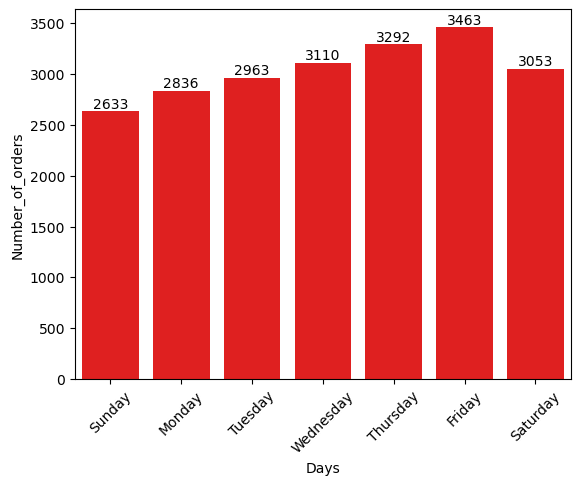

In [84]:
query =""" select dayname(str_to_date(order_date, '%d-%m-%y')) as Days,  count(distinct order_id) as Number_of_orders
from pizza_sales
group by days
order by field(days, 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday') """

cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data, columns= ['Days','Number_of_orders'])
L = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.barplot(x = df['Days'], y = df['Number_of_orders'], data=df, order = L, color = 'red')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

# Monthly Trend for Orders

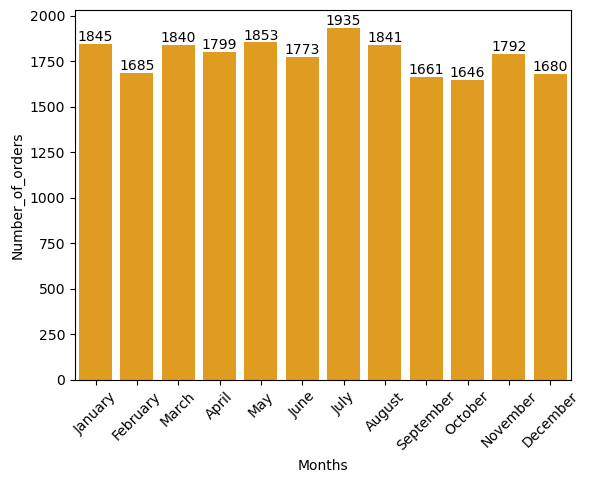

In [86]:
query =""" select monthname(str_to_date(order_date, '%d-%m-%Y')) as Months, count(distinct order_id) as Number_of_orders
from pizza_sales
group by months
order by field(months, 'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December') """

cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns = ['Months', 'Number_of_orders'])
L = ["January", "February", "March", "April", "May", "June", 
     "July", "August", "September", "October", "November", "December"]
ax = sns.barplot(x = df['Months'], y = df['Number_of_orders'], data=df, order = L, color = 'orange')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

# % of Sales by Pizza Category

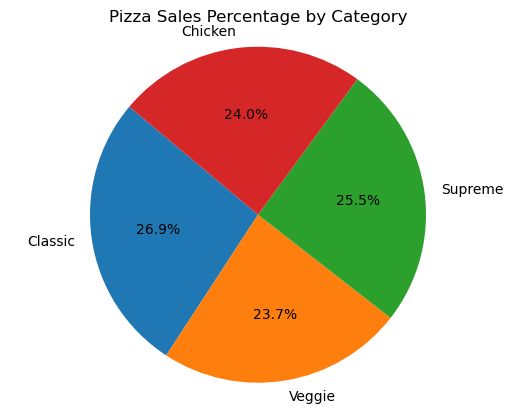

In [92]:
query =""" with cte as (
select sum(total_price) as summ
from pizza_sales
)
select pizza_category as Category, round((sum(total_price)/(select summ from cte))*100, 2) as 'Sales in percentage'
from pizza_sales
group by pizza_category
order by 'Sales in percentage'; """

cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns=['Category', 'Sales in percentage'])
df.head()
d = plt.pie(df['Sales in percentage'], labels = df['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Pizza Sales Percentage by Category')
plt.axis('equal')
plt.show()

#  % of Sales by Pizza Size

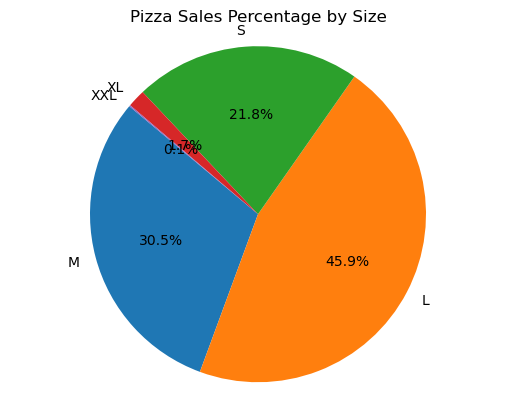

In [102]:
query =""" with cte as (
select sum(total_price) as summ
from pizza_sales
)
select pizza_size as Size, round((sum(total_price)/(select summ from cte))*100, 2) as 'Sales in percentage'
from pizza_sales
group by pizza_size
order by 'Sales in percentage' desc;
 """

cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns=['Size', 'Sales in percentage'])
df.head()
d = plt.pie(df['Sales in percentage'], labels = df['Size'], autopct='%1.1f%%', startangle=140)
plt.title('Pizza Sales Percentage by Size')
plt.axis('equal')
plt.show()

# Total Pizzas Sold by Pizza Category

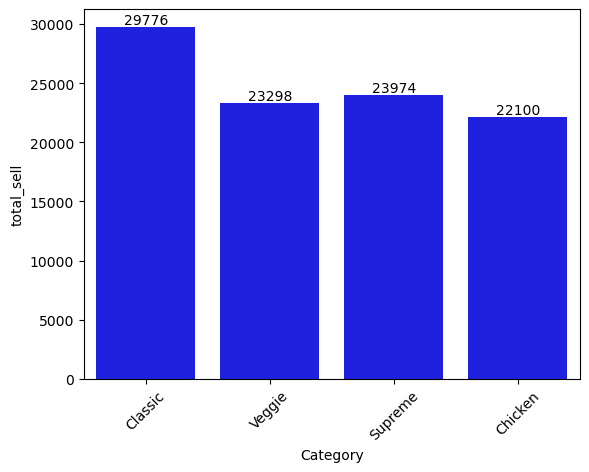

In [106]:
query =""" select pizza_category as Category, sum(quantity) as total_sell
from pizza_sales
group by pizza_category;
 """

cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns = ['Category', 'total_sell'])
ax = sns.barplot(x = df['Category'], y = df['total_sell'], data=df, color = 'blue')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

# Top 5 Pizzas by Revenue

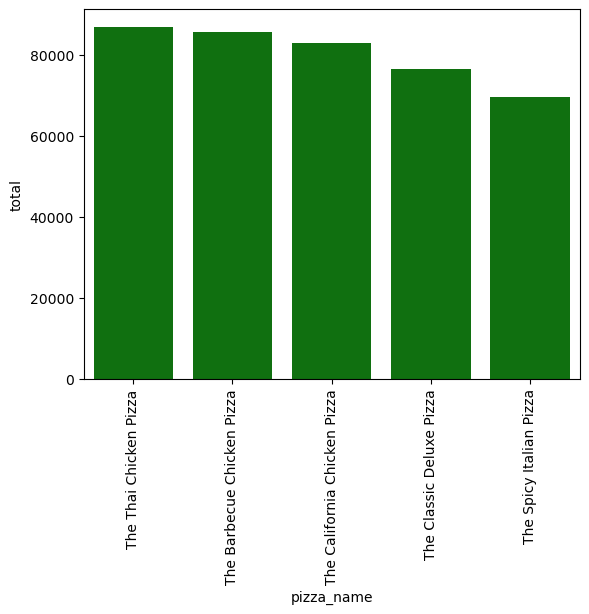

In [112]:
query =""" 
select pizza_name, sum(total_price) as total
from pizza_sales
group by pizza_name
order by total desc limit 5 ;
 """

cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns = ['pizza_name','total'])
df = df.head()
sns.barplot(x='pizza_name', y='total', data=df, color='green')
plt.xticks(rotation = 90)
plt.show()

# Bottom 5 Pizzas by Revenue

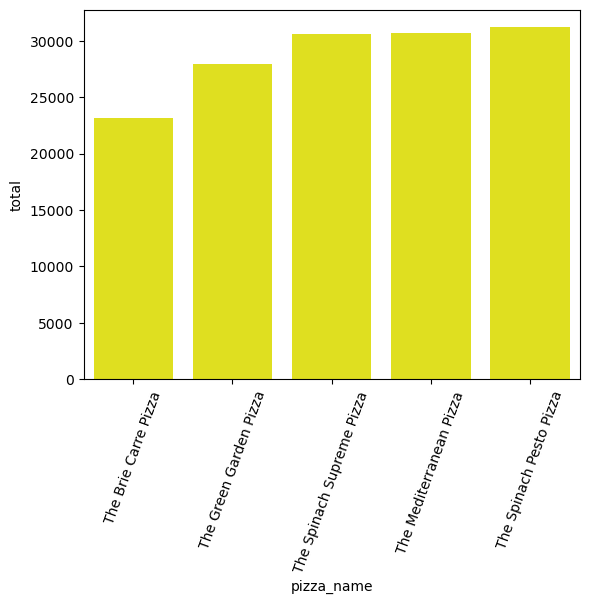

In [120]:
query =""" 
select pizza_name, sum(total_price) as total
from pizza_sales
group by pizza_name
order by total limit 5 ;
 """

cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns = ['pizza_name','total'])
df = df.head()
sns.barplot(x='pizza_name', y='total', data=df, color='yellow')
plt.xticks(rotation = 70)
plt.show()

# Top 5 Pizzas by Quantity

C:\Users\sehga\AppData\Local\Temp\ipykernel_23844\1739054349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pizza_name', y='total', data=df, palette='magma')


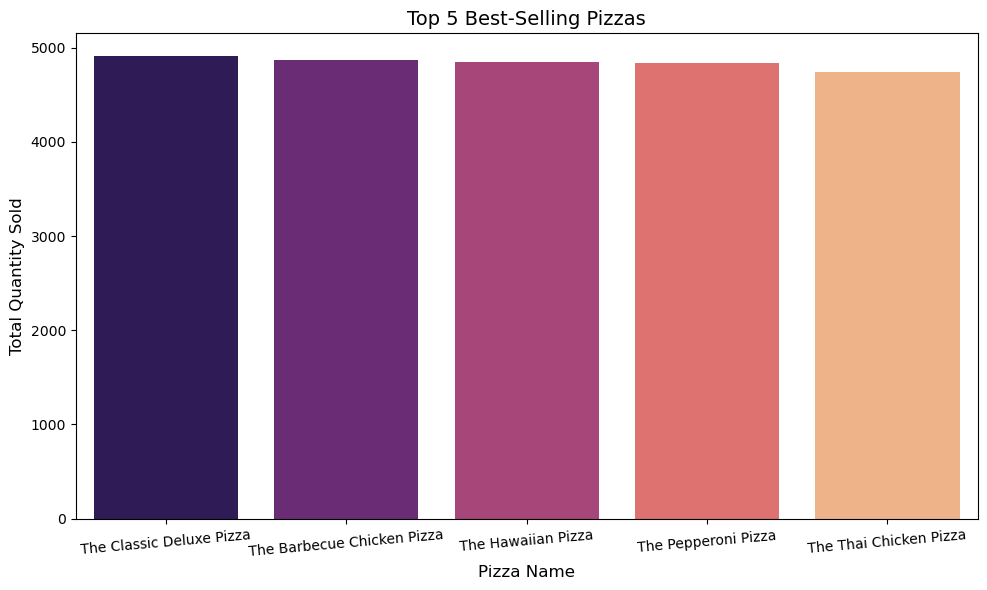

In [138]:
query =""" 
select pizza_name, sum(quantity) as total
from pizza_sales
group by pizza_name
order by total desc limit 5;
 """

cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns = ['pizza_name','total'])
df
plt.figure(figsize=(10, 6))
sns.barplot(x='pizza_name', y='total', data=df, palette='magma')
plt.title('Top 5 Best-Selling Pizzas', fontsize=14)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()


# Bottom 5 Pizzas by Quantity

C:\Users\sehga\AppData\Local\Temp\ipykernel_23844\3303513726.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pizza_name', y='total', data=df, palette='cubehelix')


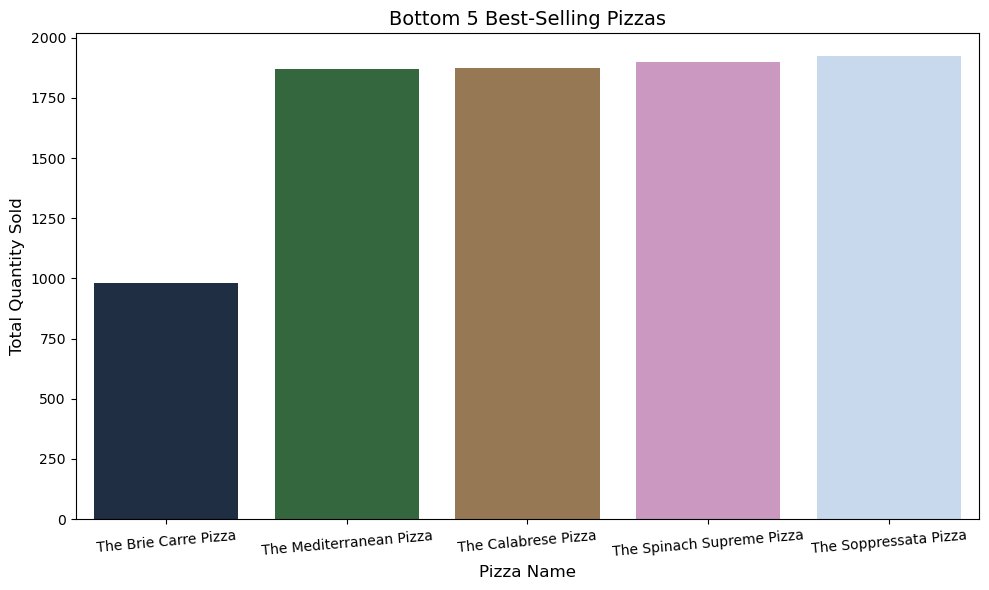

In [140]:
query =""" 
select pizza_name, sum(quantity) as total
from pizza_sales
group by pizza_name
order by total limit 5;
 """

cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns = ['pizza_name','total'])
df
plt.figure(figsize=(10, 6))
sns.barplot(x='pizza_name', y='total', data=df, palette='cubehelix')
plt.title('Bottom 5 Best-Selling Pizzas', fontsize=14)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

# Top 5 Pizzas by Total Orders

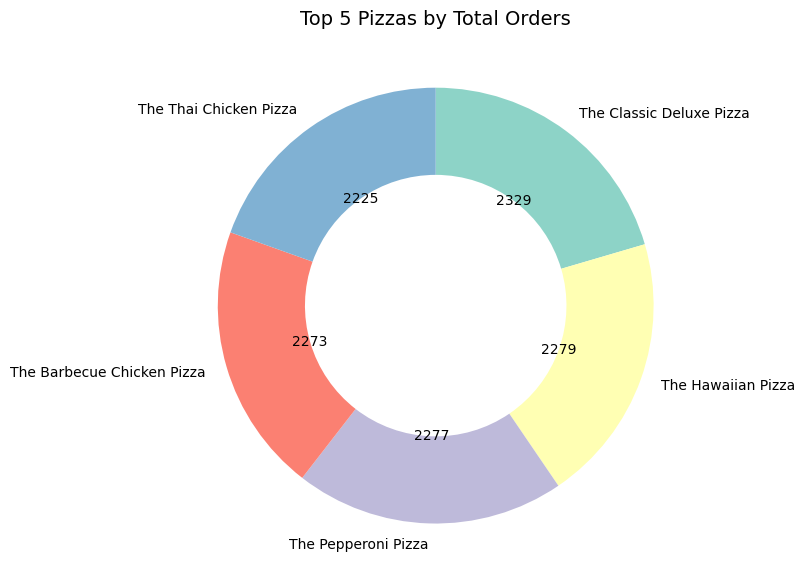

In [152]:
query = """ 
select pizza_name, count(distinct order_id) as orders
from pizza_sales
group by pizza_name
order by orders desc limit 5
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['pizza_name', 'orders'])

plt.figure(figsize=(8, 8))
colors = plt.get_cmap('Set3').colors

wedges, texts, autotexts = plt.pie(
    df['orders'], 
    labels=df['pizza_name'], 
    autopct=lambda p: f'{int(p * sum(df["orders"]) / 100)}', 
    startangle=90, 
    counterclock=False, 
    colors=colors, 
    wedgeprops={'width': 0.4}  # Creates the donut hole
)

plt.title('Top 5 Pizzas by Total Orders', fontsize=14)
plt.tight_layout()
plt.show()


# Bottom 5 Pizzas by Total Orders

C:\Users\sehga\AppData\Local\Temp\ipykernel_23844\570729348.py:25: UserWarning: Glyph 127829 (\N{SLICE OF PIZZA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sehga\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127829 (\N{SLICE OF PIZZA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


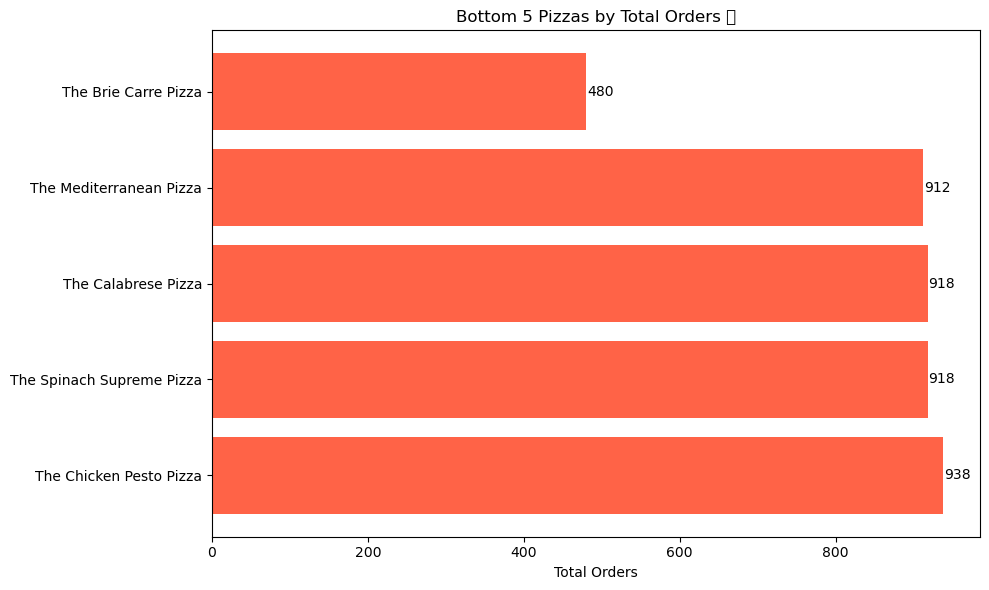

In [144]:
query =""" 
select pizza_name, count(distinct order_id) as orders
from pizza_sales
group by pizza_name
order by orders limit 5;
 """

cur.execute(query)
data=cur.fetchall()
data
df = pd.DataFrame(data, columns=['Pizza Name', 'Total Orders'])

# Horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Pizza Name'], df['Total Orders'], color='tomato')

# Annotate each bar with the order count
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center')

plt.xlabel('Total Orders')
plt.title('Bottom 5 Pizzas by Total Orders')
plt.gca().invert_yaxis()  # Largest at bottom
plt.tight_layout()
plt.show()